Problem 2a: Data is appended as data_problem2.csv. Load the data and report general information of the data.
Additionally plot (as histograms) the data and discuss the separability.

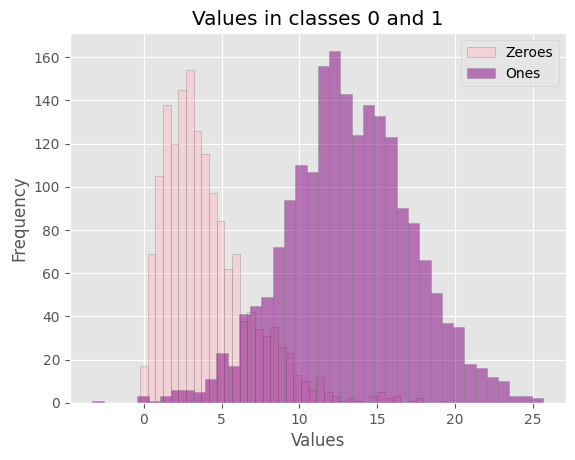

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Importing data
file_path = 'data_problem2.csv' 
data = pd.read_csv(file_path)

data_transposed = data.T
values = data_transposed.index.astype(float)

# Identifying which zeroes and ones correspond to different values
zero_values = values[data_transposed[0] == 0]
one_values = values[data_transposed[0] == 1]

# Plotting histograms
plt.hist(zero_values, bins=40, alpha=0.5, label='Zeroes', color='pink', edgecolor='grey')
plt.hist(one_values, bins=40, alpha=0.5, label='Ones', color='purple', edgecolor='grey')
plt.title('Values in classes 0 and 1')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Problem 2c: Split the data into training and test data. Use the maximum likelihood estimations to estimate the parameters based on the training data. Use the point-estimations of the parameters to implement a Bayes' classifier. Report the test accuracy.

Test Accuracy: 91.25%


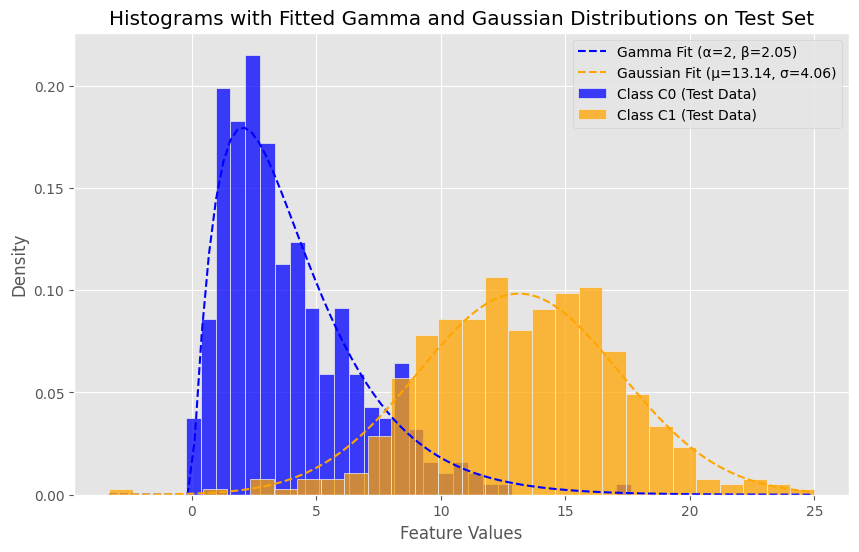

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, norm

# Step 1: Load the data
file_path = 'data_problem2.csv'
data = pd.read_csv(file_path, header=None)

# Treat row 0 as features (X) and row 1 as labels (y)
X = data.iloc[0, :].values  # Features (X)
y = data.iloc[1, :].values  # Labels (y)

# Step 2: Split the data into training and test sets (80% training, 20% test)
def split_data(X, y, test_size=0.2):
    np.random.seed(42)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    split_point = int(len(X) * (1 - test_size))
    
    X_train, X_test = X[indices[:split_point]], X[indices[split_point:]]
    y_train, y_test = y[indices[:split_point]], y[indices[split_point:]]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

# Step 3: Maximum Likelihood Estimations (MLE)
# Separate the training data into C_0 and C_1
X_train_C0 = X_train[y_train == 0]  # Samples from Class C0 (Gamma)
X_train_C1 = X_train[y_train == 1]  # Samples from Class C1 (Gaussian)

# MLE for Gamma (Class C0)
alpha = 2  # Given alpha
beta_hat = np.mean(X_train_C0) / alpha  # MLE for β (Gamma distribution parameter)

# MLE for Gaussian (Class C1)
mu_hat = np.mean(X_train_C1)  # MLE for μ (mean)
sigma_hat_sq = np.var(X_train_C1, ddof=0)  # MLE for σ² (variance)
sigma_hat = np.sqrt(sigma_hat_sq)  # Standard deviation for Gaussian

# Step 4: Implement a Bayes' classifier using the estimated parameters
def bayes_classifier(x, beta_hat, mu_hat, sigma_hat_sq, alpha):
    # Likelihood for Gamma (Class 0)
    likelihood_C0 = (x ** (alpha - 1) * np.exp(-x / beta_hat)) / (beta_hat ** alpha)
    
    # Likelihood for Gaussian (Class 1)
    likelihood_C1 = (1 / np.sqrt(2 * np.pi * sigma_hat_sq)) * np.exp(-(x - mu_hat) ** 2 / (2 * sigma_hat_sq))
    
    # Assign the class based on the higher likelihood
    return 0 if likelihood_C0 > likelihood_C1 else 1

# Step 5: Classify the test set and compute accuracy
y_pred = np.array([bayes_classifier(x, beta_hat, mu_hat, sigma_hat_sq, alpha) for x in X_test])

# Compute the accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 6: Plot histograms with fitted Gamma and Gaussian distributions for both classes

plt.figure(figsize=(10, 6))

# Plot histogram for Class C0 (Gamma) with fitted Gamma distribution
sns.histplot(X_test[y_test == 0], color='blue', kde=False, stat='density', label='Class C0 (Test Data)', bins=30)
x_vals_C0 = np.linspace(min(X_test), max(X_test), 100)
plt.plot(x_vals_C0, gamma.pdf(x_vals_C0, alpha, scale=beta_hat), color='blue', linestyle='--', label=f'Gamma Fit (α={alpha}, β={beta_hat:.2f})')

# Plot histogram for Class C1 (Gaussian) with fitted Gaussian distribution
sns.histplot(X_test[y_test == 1], color='orange', kde=False, stat='density', label='Class C1 (Test Data)', bins=30)
x_vals_C1 = np.linspace(min(X_test), max(X_test), 100)
plt.plot(x_vals_C1, norm.pdf(x_vals_C1, mu_hat, sigma_hat), color='orange', linestyle='--', label=f'Gaussian Fit (μ={mu_hat:.2f}, σ={sigma_hat:.2f})')

# Add labels and title
plt.title('Histograms with Fitted Gamma and Gaussian Distributions on Test Set')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend()
plt.show()



Problem 2d: Explain why the Bayes’ classifier minimizes the probability of miss-classification when the probability
distribution of the data is known.
Show the missclassified data in a plot along with the rest of the data and explain why it was miss-
classified. Does it follow the conclusion in a?

Test Accuracy: 91.25%
Number of misclassified points: 63


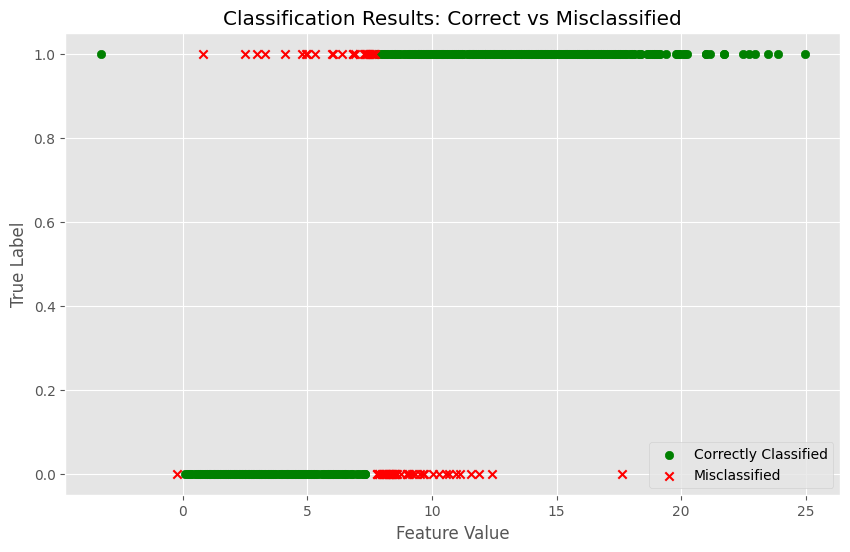

Explanation of Misclassified Points:
Misclassified Data: [ 9.18465206  7.8792068   8.1681298   7.39649106  2.97466955  8.30268731
  8.33633838 10.27427742  8.97796148 17.64517969  8.17304478 10.57325228
  7.66164835  7.85367385  7.80533772 12.40892194  5.97808418  6.90194078
  9.08111136  7.46825075 11.13315182  5.31604248  7.98755285  9.53049909
  8.06550484  7.52973893  8.52805609  4.93540393  4.1060014   2.47407753
  7.59519182 10.026756    6.82649993  9.62568312  8.73521803  7.7163724
  7.28236212  6.82943633  9.30118833  7.3116534   8.25693976  0.79209588
  8.54640367 10.948984    4.77718687  8.43186986 11.57076401  7.35886329
  8.37598718 11.86938474  7.79807361 -0.23475789  8.0045123   6.01084826
  6.37148409  8.97706961  8.51005266  4.96554948  3.28596312 10.69003521
  8.37680186  8.58023767  9.68263228]
These points are likely near the boundary between the Gamma and Gaussian distributions, where the likelihoods are close, making them difficult to classify correctly.


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, norm

# Step 1: Load the data
file_path = 'data_problem2.csv'  
data = pd.read_csv(file_path, header=None)

# Treat row 0 as features (X) and row 1 as labels (y)
X = data.iloc[0, :].values  # Features (X)
y = data.iloc[1, :].values  # Labels (y)

# Step 2: Split the data into training and test sets (80% training, 20% test)
def split_data(X, y, test_size=0.2):
    np.random.seed(42)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    split_point = int(len(X) * (1 - test_size))
    
    X_train, X_test = X[indices[:split_point]], X[indices[split_point:]]
    y_train, y_test = y[indices[:split_point]], y[indices[split_point:]]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

# Step 3: Maximum Likelihood Estimations (MLE)
# Separate the training data into C_0 and C_1
X_train_C0 = X_train[y_train == 0]  # Samples from Class C0 (Gamma)
X_train_C1 = X_train[y_train == 1]  # Samples from Class C1 (Gaussian)

# MLE for Gamma (Class C0)
alpha = 2  # Given alpha
beta_hat = np.mean(X_train_C0) / alpha  # MLE for β (Gamma distribution parameter)

# MLE for Gaussian (Class C1)
mu_hat = np.mean(X_train_C1)  # MLE for μ (mean)
sigma_hat_sq = np.var(X_train_C1, ddof=0)  # MLE for σ² (variance)
sigma_hat = np.sqrt(sigma_hat_sq)  # Standard deviation for Gaussian

# Step 4: Implement a Bayes' classifier using the estimated parameters
def bayes_classifier(x, beta_hat, mu_hat, sigma_hat_sq, alpha):
    # Likelihood for Gamma (Class 0)
    likelihood_C0 = (x ** (alpha - 1) * np.exp(-x / beta_hat)) / (beta_hat ** alpha)
    
    # Likelihood for Gaussian (Class 1)
    likelihood_C1 = (1 / np.sqrt(2 * np.pi * sigma_hat_sq)) * np.exp(-(x - mu_hat) ** 2 / (2 * sigma_hat_sq))
    
    # Assign the class based on the higher likelihood
    return 0 if likelihood_C0 > likelihood_C1 else 1

# Step 5: Classify the test set and compute accuracy
y_pred = np.array([bayes_classifier(x, beta_hat, mu_hat, sigma_hat_sq, alpha) for x in X_test])

# Identify misclassified data points
misclassified_indices = np.where(y_pred != y_test)[0]
correctly_classified_indices = np.where(y_pred == y_test)[0]

# Print accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Number of misclassified points: {len(misclassified_indices)}")

# Step 6: Plot the correctly classified and misclassified points

plt.figure(figsize=(10, 6))

# Plot correctly classified points
plt.scatter(X_test[correctly_classified_indices], y_test[correctly_classified_indices], color='green', label='Correctly Classified')

# Plot misclassified points
plt.scatter(X_test[misclassified_indices], y_test[misclassified_indices], color='red', label='Misclassified', marker='x')

plt.title('Classification Results: Correct vs Misclassified')
plt.xlabel('Feature Value')
plt.ylabel('True Label')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Explanation of misclassified points
print("Explanation of Misclassified Points:")
if len(misclassified_indices) > 0:
    print(f"Misclassified Data: {X_test[misclassified_indices]}")
    print("These points are likely near the boundary between the Gamma and Gaussian distributions, where the likelihoods are close, making them difficult to classify correctly.")
else:
    print("No data points were misclassified.")
